<a href="https://colab.research.google.com/github/SaketKaswa20/Data_Analytics_Mini_Project/blob/main/112113030_DA_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####SAKET KASWA
-------------------------
#####112113030
-------------------------
#####T.Y. MANUFACTURING
-------------------------
MRF STOCK PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the CSV

In [2]:
df= pd.read_csv('MRF.NS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,910.000000,910.0,880.000000,897.599976,815.841370,426.0
1,2002-07-02,900.000000,905.0,895.000000,903.650024,821.340393,310.0
2,2002-07-03,910.000000,910.0,900.000000,906.700012,824.112366,336.0
3,2002-07-04,920.000000,925.0,910.000000,916.799988,833.292358,591.0
4,2002-07-05,915.000000,935.0,910.000000,927.299988,842.836182,1623.0
...,...,...,...,...,...,...,...
4788,2021-09-23,80600.000000,80999.0,80001.546875,80220.703125,80220.703125,6530.0
4789,2021-09-24,80500.000000,80690.0,79055.046875,79456.500000,79456.500000,11095.0
4790,2021-09-27,79949.000000,82000.0,79144.648438,81893.398438,81893.398438,20927.0
4791,2021-09-28,81759.398438,81890.0,79810.000000,80488.601563,80488.601563,14053.0


In [3]:
open=df[(df['Adj Close']=='821.340393')]['Open']
open

Series([], Name: Open, dtype: float64)

# Visualize the dataset with 10 possible graphs

Graph 1: Line plot for 'Close'

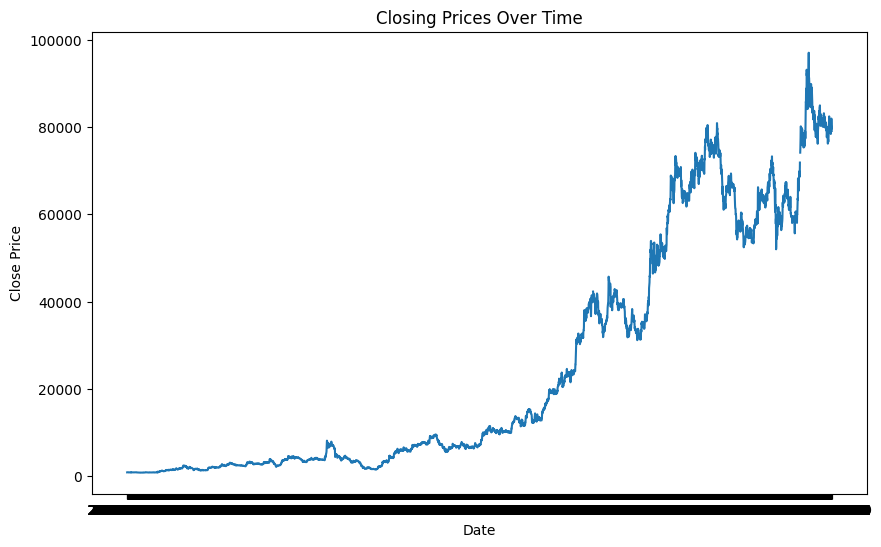

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

Graph 2: Bar plot for 'Open'

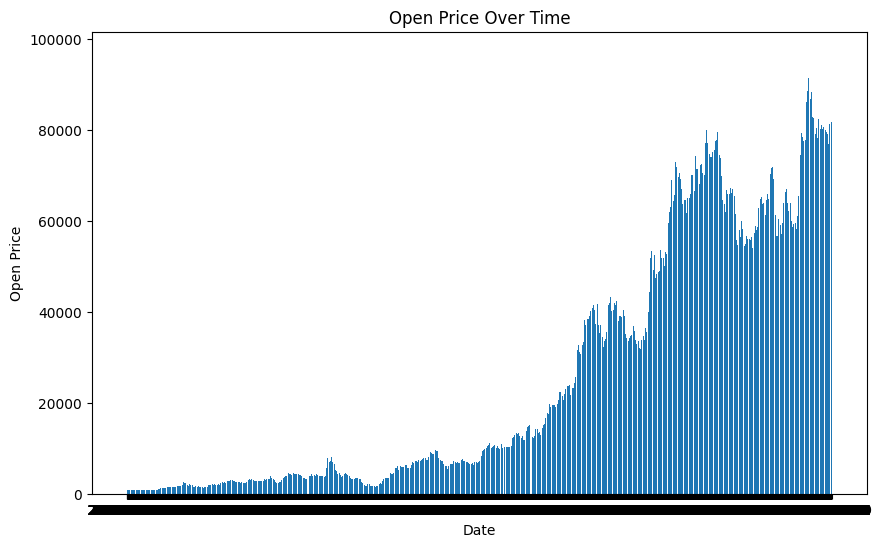

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Open'])
plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

Graph 3: Scatter plot for 'Open' and 'Close'

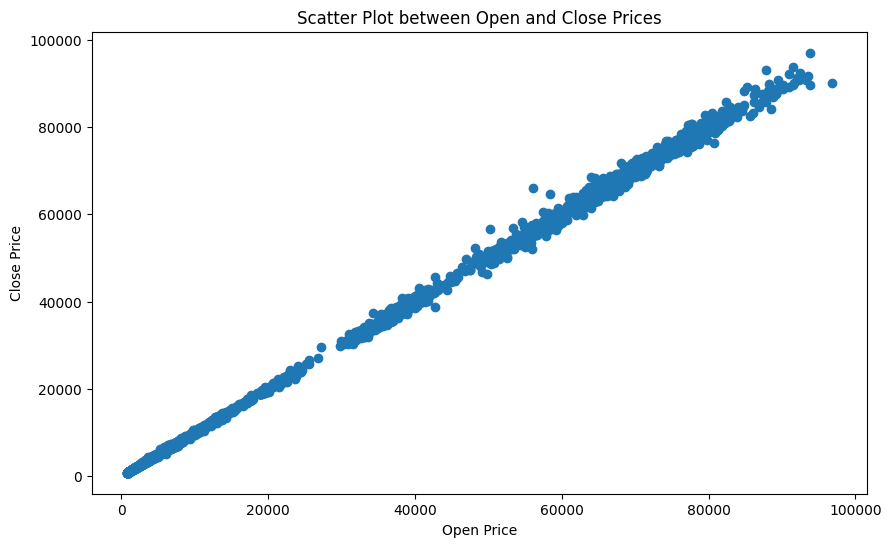

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Open'], df['Close'])
plt.title('Scatter Plot between Open and Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

Graph 4: Histogram for 'Close Price'

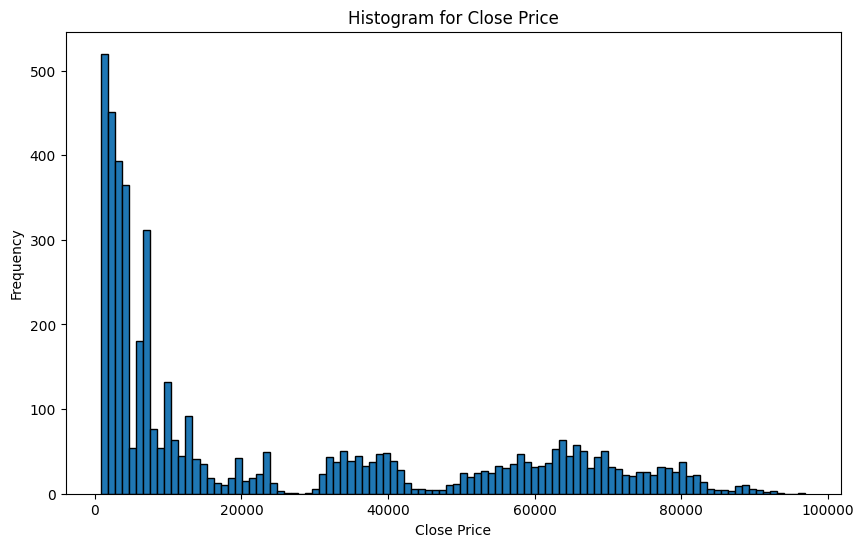

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=100, edgecolor='black')
plt.title('Histogram for Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

Graph 5: Box plot for 'High' and 'Low'

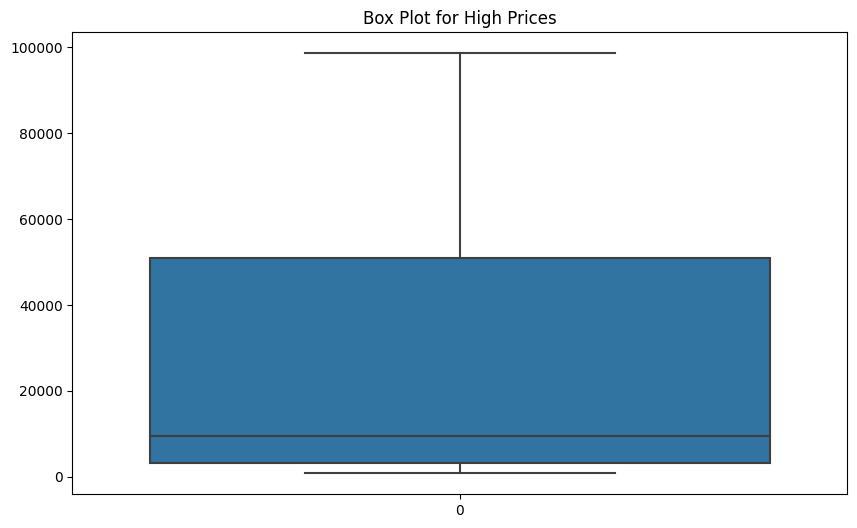

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['High'])
plt.title('Box Plot for High Prices')
plt.show()

Graph 6: Pie Chart for 'Close Price' and 'Volume'

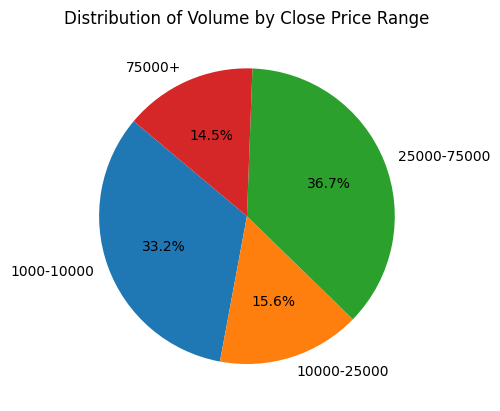

In [ ]:
conditions = [
    (df['Close'] > 1000) & (df['Close'] < 10000),
    (df['Close'] >= 10000) & (df['Close'] < 25000),
    (df['Close'] >= 25000) & (df['Close'] < 75000),
    (df['Close'] >= 75000)
]

labels = ['1000-10000', '10000-25000', '25000-75000', '75000+']

# Apply conditions to create a new 'Price Range' column
df['Price Range'] = pd.cut(df['Close'], bins=[0, 10000, 25000, 75000, float('inf')], labels=labels)

# Calculate the sum of volumes for each price range
volume_by_price_range = df.groupby('Price Range')['Volume'].sum()

plt.pie(volume_by_price_range, labels=volume_by_price_range.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Volume by Close Price Range')
plt.show()

Graph 7: Heat Map



<ipython-input-7-e700cc7d7aee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


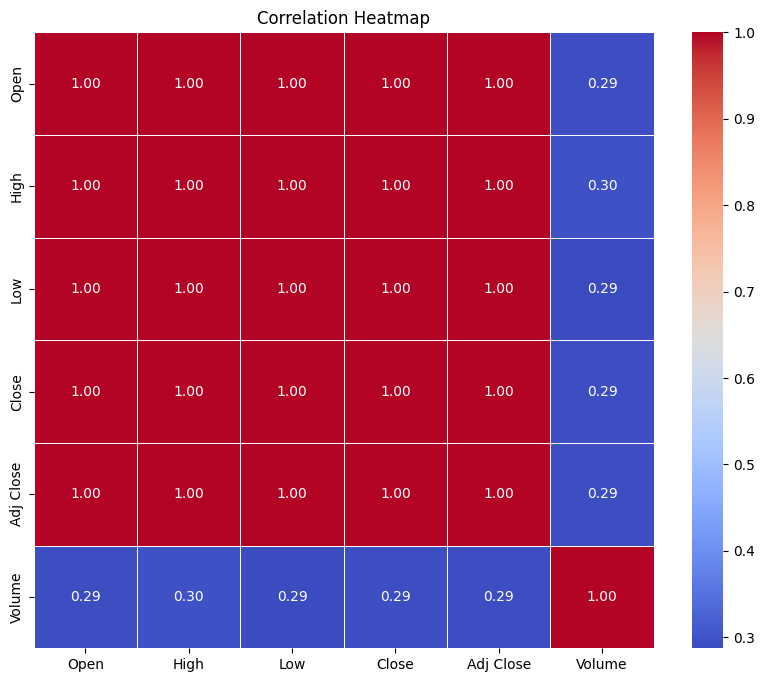

In [7]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Graph 8: Line plot for 'Open'

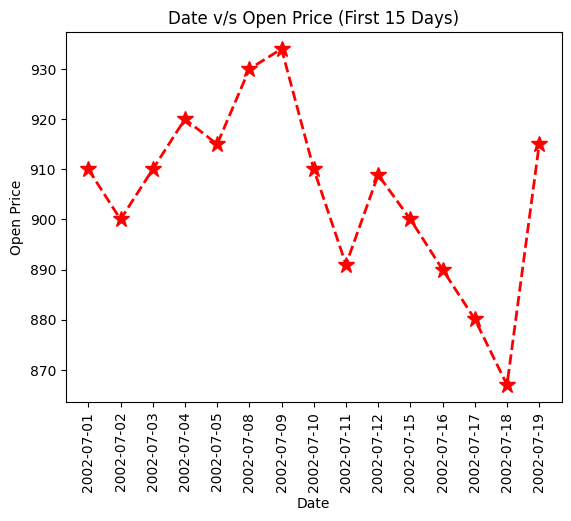

In [ ]:
# Filter the first 15 values
df_filtered = df.head(15)

plt.plot(df_filtered['Date'], df_filtered['Open'], 'r*', linestyle='dashed', linewidth=2, markersize=12)
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Date v/s Open Price (First 15 Days)')
plt.xticks(rotation=90)
plt.show()

Graph 9: Creating Subplots

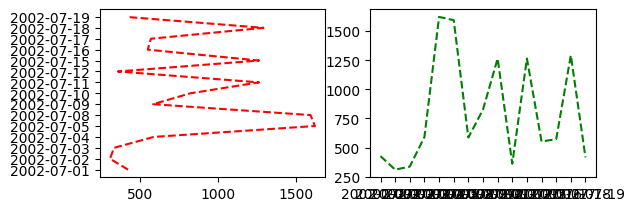

In [ ]:
##creating subplots
plt.subplot(2,2,1)
plt.plot(df_filtered['Volume'],df_filtered['Date'],'r--')
plt.subplot(2,2,2)
plt.plot(df_filtered['Date'],df_filtered['Volume'],'g--')

Graph 10: Bar Plot for 'High' and 'Volume'

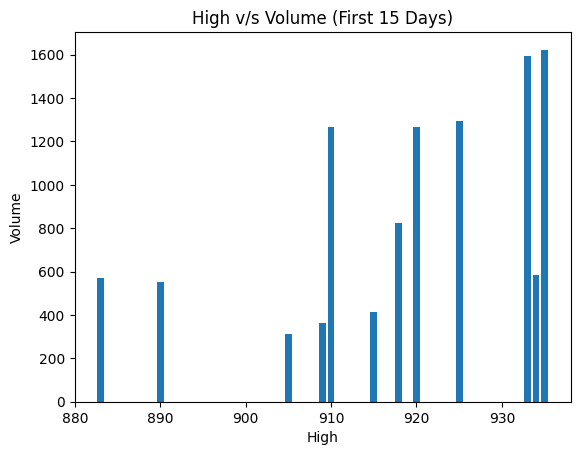

In [ ]:
plt.bar(df_filtered['High'],df_filtered['Volume'])
plt.xlabel('High')
plt.ylabel('Volume')
plt.title('High v/s Volume (First 15 Days)')
plt.show()

#Filtering Data by applying GroupBy

Group by 'High' and Calculate Maximum Volume:

This groups the data by the 'High' column and calculates the maximum volume for each series.

In [ ]:
max_volume_by_high = df.groupby('High')['Volume'].max()
max_volume_by_high

High
828.000000         185.0
833.900024         422.0
840.000000         140.0
841.900024          74.0
842.500000           0.0
                  ...   
94345.953125     90867.0
94699.000000     69603.0
96479.703125    111415.0
97880.796875     72305.0
98599.953125    182954.0
Name: Volume, Length: 3939, dtype: float64

Group by 'Year' and 'Month' and Calculate Total Volume:

This creates 'Year' and 'Month' columns from the 'Date' column, and then groups the data by year and month to calculate the total volume.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
total_turnover_by_year_month = df.groupby(['Year', 'Month'])['Volume'].sum()
total_turnover_by_year_month

Year  Month
2002  7         20214.0
      8         18262.0
      9          8948.0
      10         4637.0
      11         3313.0
                 ...   
2021  5        360900.0
      6        340341.0
      7        190621.0
      8        277835.0
      9        250821.0
Name: Volume, Length: 231, dtype: float64

Group by 'Year' and 'Month' and Calculate Average Close Price:

This creates 'Year' and 'Month' columns from the 'Date' column and groups the data by year and month, calculating the average close price for each period.

In [ ]:
avg_close_by_year_month = df.groupby(['Year', 'Month'])['Close'].mean()
avg_close_by_year_month

Year  Month
2002  7          898.530441
      8          904.686365
      9          906.457147
      10         851.426089
      11         846.185718
                   ...     
2021  5        79956.472266
      6        82103.731889
      7        81038.938244
      8        78614.666295
      9        80241.028125
Name: Close, Length: 231, dtype: float64

Group by 'Year' and Calculate Total Volume:

This creates a 'Year' column from the 'Date' column and groups the data by year, calculating the total volume for each year.

In [ ]:
total_volume_by_year = df.groupby('Year')['Volume'].sum()
total_volume_by_year

Year
2002      71663.0
2003     598150.0
2004     755233.0
2005     871343.0
2006     871101.0
2007     973807.0
2008     497621.0
2009    2411326.0
2010    3731026.0
2011    2737102.0
2012    3389942.0
2013    3025079.0
2014    2874208.0
2015    2627923.0
2016    2619605.0
2017    3357240.0
2018    1734751.0
2019    1485103.0
2020    4596957.0
2021    4628746.0
Name: Volume, dtype: float64

Group by 'Month' and Calculate Median Close Price:

This creates a 'Month' column from the 'Date' column and groups the data by month, calculating the median close price for each month.

In [ ]:
df['Month'] = df['Date'].dt.month
median_close_by_month = df.groupby('Month')['Close'].median()
median_close_by_month

Month
1      7374.149902
2      9354.049805
3      9701.900391
4     10764.200195
5     10463.150391
6     10201.100097
7      7867.000000
8      7739.700195
9      9075.650391
10     9155.950195
11     8371.200195
12     7533.649902
Name: Close, dtype: float64

#Filtering Data without using GroupBy

Filter for Close Prices above 1000 and below 10000:

In [ ]:
filter_condition = (df['Close'] > 1000) & (df['Close'] < 10000)
filtered_data = df[filter_condition]
filtered_data

,Date,Open,High,Low,Close,Adj Close,Volume,Price Range,Year,Month
207,2003-04-16,935.000000,1057.099976,935.000000,1057.099976,982.571472,4558.0,1000-10000,2003,4
208,2003-04-17,1085.000000,1089.949951,997.000000,1005.849976,934.935059,4659.0,1000-10000,2003,4
209,2003-04-18,1005.849976,1005.849976,1005.849976,1005.849976,934.935059,0.0,1000-10000,2003,4
214,2003-04-25,937.000000,1053.349976,937.000000,1010.000000,938.792480,5426.0,1000-10000,2003,4
215,2003-04-28,1000.000000,1020.000000,997.200012,1000.500000,929.962341,972.0,1000-10000,2003,4
...,...,...,...,...,...,...,...,...,...,...
2534,2012-08-01,9601.599609,9777.000000,9521.299805,9736.900391,9603.847656,7871.0,1000-10000,2012,8
2535,2012-08-02,9734.950195,9843.950195,9715.000000,9806.750000,9672.741211,5969.0,1000-10000,2012,8
2552,2012-08-29,10426.000000,10444.799805,9866.000000,9974.450195,9841.000000,19048.0,1000-10000,2012,8
2592,2012-10-29,10025.000000,10125.049805,9900.000000,9966.900391,9833.551758,12444.0,1000-10000,2012,10


Filter for Close Prices above 10000 and below 25000:

In [ ]:
filter_condition = (df['Close'] >= 10000) & (df['Close'] < 25000)
filtered_data = df[filter_condition]
filtered_data

,Date,Open,High,Low,Close,Adj Close,Volume,Price Range,Year,Month
2421,2012-02-21,9800.000000,10155.000000,9670.000000,10045.900391,9908.624023,28699.0,10000-25000,2012,2
2435,2012-03-12,9949.000000,10075.000000,9810.500000,10033.099609,9895.997070,16328.0,10000-25000,2012,3
2436,2012-03-13,9999.000000,10299.900391,9999.000000,10231.500000,10091.688477,19173.0,10000-25000,2012,3
2437,2012-03-14,10291.900391,10344.700195,10040.000000,10088.549805,9950.691406,9726.0,10000-25000,2012,3
2438,2012-03-15,9999.000000,10155.000000,9931.049805,10016.549805,9879.672852,10303.0,10000-25000,2012,3
...,...,...,...,...,...,...,...,...,...,...
3043,2014-08-22,24250.000000,24400.000000,24199.250000,24325.150391,24085.371094,2579.0,10000-25000,2014,8
3044,2014-08-25,24325.150391,24379.949219,24065.000000,24112.900391,23875.205078,2870.0,10000-25000,2014,8
3045,2014-08-26,24005.050781,24211.949219,23900.000000,24047.300781,23810.257813,3073.0,10000-25000,2014,8
3046,2014-08-27,24112.900391,24320.000000,24002.050781,24255.400391,24016.300781,2907.0,10000-25000,2014,8


Filter to Calculate Highest Open Price:

In [ ]:
highest_open_price = df[df['Open'] == df['Open'].max()]
highest_open_price

,Date,Open,High,Low,Close,Adj Close,Volume,Price Range,Year,Month
4637,2021-02-11,96770.0,98599.953125,89120.0,90084.703125,90026.09375,182954.0,75000+,2021,2


Filter to Calculate Highest Close Price:

In [ ]:
highest_close_price = df[df['Close'] == df['Close'].max()]
highest_close_price

,Date,Open,High,Low,Close,Adj Close,Volume,Price Range,Year,Month
4636,2021-02-10,93852.0,97880.796875,92750.0,96973.851563,96910.757813,72305.0,75000+,2021,2


Filter to Calculate Highest Volume Traded:

In [ ]:
highest_volume_traded = df[df['Volume'] == df['Volume'].max()]
highest_volume_traded

,Date,Open,High,Low,Close,Adj Close,Volume,Price Range,Year,Month
4586,2020-11-27,76500.0,79228.953125,75300.0,77738.648438,77688.070313,281075.0,75000+,2020,11


#Data PreProcessing

Finding Missing Values

In [ ]:
df.isna

<bound method DataFrame.isna of             Date          Open     High           Low         Close  \
0     2002-07-01    910.000000    910.0    880.000000    897.599976   
1     2002-07-02    900.000000    905.0    895.000000    903.650024   
2     2002-07-03    910.000000    910.0    900.000000    906.700012   
3     2002-07-04    920.000000    925.0    910.000000    916.799988   
4     2002-07-05    915.000000    935.0    910.000000    927.299988   
...          ...           ...      ...           ...           ...   
4788  2021-09-23  80600.000000  80999.0  80001.546875  80220.703125   
4789  2021-09-24  80500.000000  80690.0  79055.046875  79456.500000   
4790  2021-09-27  79949.000000  82000.0  79144.648438  81893.398438   
4791  2021-09-28  81759.398438  81890.0  79810.000000  80488.601563   
4792  2021-09-29  80306.101563  80431.5  78901.046875  79056.703125   

         Adj Close   Volume  
0       815.841370    426.0  
1       821.340393    310.0  
2       824.112366    336

In [ ]:
df.isna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4788,False,False,False,False,False,False,False
4789,False,False,False,False,False,False,False
4790,False,False,False,False,False,False,False
4791,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Date          0
Open         17
High         17
Low          17
Close        17
Adj Close    17
Volume       17
dtype: int64

In [ ]:
null_values = df[df['Close'].isnull()]

# Display the rows where 'Close' is null
print(null_values)

            Date  Open  High  Low  Close  Adj Close  Volume
205   2003-04-14   NaN   NaN  NaN    NaN        NaN     NaN
475   2004-04-26   NaN   NaN  NaN    NaN        NaN     NaN
597   2004-10-13   NaN   NaN  NaN    NaN        NaN     NaN
1884  2009-12-23   NaN   NaN  NaN    NaN        NaN     NaN
1885  2009-12-24   NaN   NaN  NaN    NaN        NaN     NaN
1886  2009-12-29   NaN   NaN  NaN    NaN        NaN     NaN
1887  2009-12-30   NaN   NaN  NaN    NaN        NaN     NaN
1888  2009-12-31   NaN   NaN  NaN    NaN        NaN     NaN
1913  2010-02-06   NaN   NaN  NaN    NaN        NaN     NaN
2391  2012-01-07   NaN   NaN  NaN    NaN        NaN     NaN
2430  2012-03-03   NaN   NaN  NaN    NaN        NaN     NaN
2560  2012-09-08   NaN   NaN  NaN    NaN        NaN     NaN
2602  2012-11-11   NaN   NaN  NaN    NaN        NaN     NaN
2939  2014-03-22   NaN   NaN  NaN    NaN        NaN     NaN
3168  2015-02-28   NaN   NaN  NaN    NaN        NaN     NaN
4313  2019-10-27   NaN   NaN  NaN    NaN

In [ ]:
df.fillna(df.mean())

<ipython-input-103-a2478f315f9e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean())


,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,910.000000,910.0,880.000000,897.599976,815.841370,426.0
1,2002-07-02,900.000000,905.0,895.000000,903.650024,821.340393,310.0
2,2002-07-03,910.000000,910.0,900.000000,906.700012,824.112366,336.0
3,2002-07-04,920.000000,925.0,910.000000,916.799988,833.292358,591.0
4,2002-07-05,915.000000,935.0,910.000000,927.299988,842.836182,1623.0
...,...,...,...,...,...,...,...
4788,2021-09-23,80600.000000,80999.0,80001.546875,80220.703125,80220.703125,6530.0
4789,2021-09-24,80500.000000,80690.0,79055.046875,79456.500000,79456.500000,11095.0
4790,2021-09-27,79949.000000,82000.0,79144.648438,81893.398438,81893.398438,20927.0
4791,2021-09-28,81759.398438,81890.0,79810.000000,80488.601563,80488.601563,14053.0


In [ ]:
df.interpolate()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,910.000000,910.0,880.000000,897.599976,815.841370,426.0
1,2002-07-02,900.000000,905.0,895.000000,903.650024,821.340393,310.0
2,2002-07-03,910.000000,910.0,900.000000,906.700012,824.112366,336.0
3,2002-07-04,920.000000,925.0,910.000000,916.799988,833.292358,591.0
4,2002-07-05,915.000000,935.0,910.000000,927.299988,842.836182,1623.0
...,...,...,...,...,...,...,...
4788,2021-09-23,80600.000000,80999.0,80001.546875,80220.703125,80220.703125,6530.0
4789,2021-09-24,80500.000000,80690.0,79055.046875,79456.500000,79456.500000,11095.0
4790,2021-09-27,79949.000000,82000.0,79144.648438,81893.398438,81893.398438,20927.0
4791,2021-09-28,81759.398438,81890.0,79810.000000,80488.601563,80488.601563,14053.0


In [ ]:
df=df.dropna()

#Applying Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Step 2: Data Preprocessing
# For simplicity, let's consider 'Close' as the target variable and 'Open' as the feature
X = df['Open'].values.reshape(-1, 1)  # Feature
y = df['Close'].values  # Target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [ ]:
# Step 3: Apply Simple Linear Regression
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 393320.29414285737


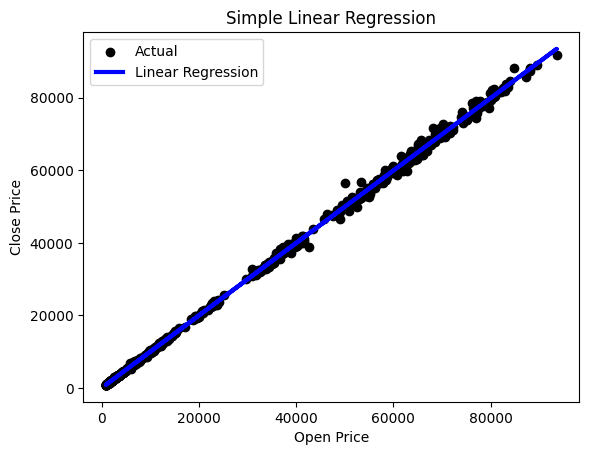

In [ ]:
# Step 5: Visualize the results
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear Regression')
plt.title('Simple Linear Regression')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()